# GSE145980
## Xiaonan Wang
## 12Nov2022

In [1]:
#%matplotlib nbagg
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
import pandas as pd
from os import listdir
from os.path import isfile, join
import re
import anndata
import seaborn as sns

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()

from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list(name='gene_cmap', colors=['lightgrey', 'thistle', 'red', 'darkred']) 

sc.settings.set_figure_params(dpi=80, color_map='viridis', vector_friendly=False,  dpi_save=300)

scanpy==1.7.1 anndata==0.7.8 umap==0.5.1 numpy==1.19.5 scipy==1.5.4 pandas==1.1.5 scikit-learn==0.24.2 statsmodels==0.12.2 python-igraph==0.9.6


# Data in

In [2]:
FileDir = '/nfs01data1/Groups/Wangxiaonan/share/rev_MI/GSE145980/'

In [3]:
D1 = pd.read_csv(FileDir+'GSE145980_zebrafish_nonCM_kit_mutant_scRNA_raw_count_matrix.csv', header=0, index_col=0, sep=' ')

In [4]:
D2 = pd.read_csv(FileDir+'GSE145980_zebrafish_nonCM_wildtype_scRNA_raw_count_matrix.csv', header=0, index_col=0, sep=',')

In [6]:
D1 = D1.T
D2 = D2.T

In [7]:
print(D1.shape)
print(D2.shape)

(49133, 35117)
(38181, 35117)


In [8]:
D1ann = anndata.AnnData(X=D1)

In [9]:
D1ann.obs['Title'] = [x[:-17] for x in D1ann.obs_names]

In [10]:
D2ann = anndata.AnnData(X=D2)

In [11]:
D2ann.obs['Title'] = [x[:-17] for x in D2ann.obs_names]

In [55]:
meta = pd.read_csv('GSE145980_series_matrix.txt', sep='\t', skiprows=29, index_col=0).T

In [56]:
meta

!Sample_title,!Sample_geo_accession,!Sample_status,!Sample_submission_date,!Sample_last_update_date,!Sample_type,!Sample_channel_count,!Sample_source_name_ch1,!Sample_organism_ch1,!Sample_characteristics_ch1,!Sample_characteristics_ch1,...,!Sample_instrument_model,!Sample_library_selection,!Sample_library_source,!Sample_library_strategy,!Sample_relation,!Sample_relation,!Sample_supplementary_file_1,!series_matrix_table_begin,ID_REF,!series_matrix_table_end
wt_unjuried_1,GSM4340637,Public on Sep 06 2021,Feb 26 2020,Sep 06 2021,SRA,1,wt_unjuried_nonCMs,Danio rerio,genotype/variation: wild type,age: 4-6 month,...,Illumina NextSeq 500,cDNA,transcriptomic,RNA-Seq,BioSample: https://www.ncbi.nlm.nih.gov/biosam...,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...,NONE,NaN,GSM4340637,NaN
wt_unjuried_2,GSM4340638,Public on Sep 06 2021,Feb 26 2020,Sep 06 2021,SRA,1,wt_unjuried_nonCMs,Danio rerio,genotype/variation: wild type,age: 4-6 month,...,Illumina NextSeq 500,cDNA,transcriptomic,RNA-Seq,BioSample: https://www.ncbi.nlm.nih.gov/biosam...,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...,NONE,NaN,GSM4340638,NaN
wt_2dpi_1,GSM4340639,Public on Sep 06 2021,Feb 26 2020,Sep 06 2021,SRA,1,wt_2dpi_nonCMs,Danio rerio,genotype/variation: wild type,age: 4-6 month,...,Illumina NextSeq 500,cDNA,transcriptomic,RNA-Seq,BioSample: https://www.ncbi.nlm.nih.gov/biosam...,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...,NONE,NaN,GSM4340639,NaN
wt_2dpi_2,GSM4340640,Public on Sep 06 2021,Feb 26 2020,Sep 06 2021,SRA,1,wt_2dpi_nonCMs,Danio rerio,genotype/variation: wild type,age: 4-6 month,...,Illumina NextSeq 500,cDNA,transcriptomic,RNA-Seq,BioSample: https://www.ncbi.nlm.nih.gov/biosam...,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...,NONE,NaN,GSM4340640,NaN
wt_7dpi_1,GSM4340641,Public on Sep 06 2021,Feb 26 2020,Sep 06 2021,SRA,1,wt_7dpi_nonCMs,Danio rerio,genotype/variation: wild type,age: 4-6 month,...,Illumina NextSeq 500,cDNA,transcriptomic,RNA-Seq,BioSample: https://www.ncbi.nlm.nih.gov/biosam...,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...,NONE,NaN,GSM4340641,NaN
wt_7dpi_2,GSM4340642,Public on Sep 06 2021,Feb 26 2020,Sep 06 2021,SRA,1,wt_7dpi_nonCMs,Danio rerio,genotype/variation: wild type,age: 4-6 month,...,Illumina NextSeq 500,cDNA,transcriptomic,RNA-Seq,BioSample: https://www.ncbi.nlm.nih.gov/biosam...,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...,NONE,NaN,GSM4340642,NaN
wt_14dpi,GSM4340643,Public on Sep 06 2021,Feb 26 2020,Sep 06 2021,SRA,1,wt_14dpi_nonCMs,Danio rerio,genotype/variation: wild type,age: 4-6 month,...,Illumina NextSeq 500,cDNA,transcriptomic,RNA-Seq,BioSample: https://www.ncbi.nlm.nih.gov/biosam...,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...,NONE,NaN,GSM4340643,NaN
kit_uninjuried,GSM4340644,Public on Sep 06 2021,Feb 26 2020,Sep 06 2021,SRA,1,kit_unjuried_nonCMs,Danio rerio,genotype/variation: kit mutant; kita(w34b2);ki...,age: 4-6 month,...,Illumina NextSeq 500,cDNA,transcriptomic,RNA-Seq,BioSample: https://www.ncbi.nlm.nih.gov/biosam...,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...,NONE,NaN,GSM4340644,NaN
kit_2dpi_1,GSM4340645,Public on Sep 06 2021,Feb 26 2020,Sep 06 2021,SRA,1,kit_unjuried_nonCMs,Danio rerio,genotype/variation: kit mutant; kita(w34b2);ki...,age: 4-6 month,...,Illumina NextSeq 500,cDNA,transcriptomic,RNA-Seq,BioSample: https://www.ncbi.nlm.nih.gov/biosam...,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...,NONE,NaN,GSM4340645,NaN
kit_2dpi_2,GSM4340646,Public on Sep 06 2021,Feb 26 2020,Sep 06 2021,SRA,1,kit_2dpi_nonCMs,Danio rerio,genotype/variation: kit mutant; kita(w34b2);ki...,age: 4-6 month,...,Illumina NextSeq 500,cDNA,transcriptomic,RNA-Seq,BioSample: https://www.ncbi.nlm.nih.gov/biosam...,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...,NONE,NaN,GSM4340646,NaN


In [57]:
meta1 = pd.DataFrame(index=meta.index)
meta1['Index'] = meta['!Sample_geo_accession']
meta1['Age'] = '4-6m'
meta1['Development_stage'] = 'adult'
meta1['Condition'] = ['Healthy']*2+['Injured']*5+['Healthy']*2+['Injured']*5
meta1['Day'] = ['0','0','2','2','7','7','14','0','0','2','2','7','7','14']
meta1['Strain'] = ['wt']*7+['kita(w34b2);kitb(sa15356)']*7
meta1['Tissue'] = 'heart'
meta1['StudyID'] = 'GSE145980'
meta1['CellType'] = 'nonCMs'
meta1['Genotype'] = ['WT']*7+['kit-/-']*7
meta1['Organism'] = 'Danio rerio'
meta1['Gender'] = 'mixed'
meta1['Author'] = 'Ma'

In [59]:
meta1.index = [re.sub('kit_uninjuried', 'kit_unjuried',x) for x in meta1.index]

In [60]:
meta1

,Index,Age,Development_stage,Condition,Day,Strain,Tissue,StudyID,CellType,Genotype,Organism,Gender,Author
wt_unjuried_1,GSM4340637,4-6m,adult,Healthy,0,wt,heart,GSE145980,nonCMs,WT,Danio rerio,mixed,Ma
wt_unjuried_2,GSM4340638,4-6m,adult,Healthy,0,wt,heart,GSE145980,nonCMs,WT,Danio rerio,mixed,Ma
wt_2dpi_1,GSM4340639,4-6m,adult,Injured,2,wt,heart,GSE145980,nonCMs,WT,Danio rerio,mixed,Ma
wt_2dpi_2,GSM4340640,4-6m,adult,Injured,2,wt,heart,GSE145980,nonCMs,WT,Danio rerio,mixed,Ma
wt_7dpi_1,GSM4340641,4-6m,adult,Injured,7,wt,heart,GSE145980,nonCMs,WT,Danio rerio,mixed,Ma
wt_7dpi_2,GSM4340642,4-6m,adult,Injured,7,wt,heart,GSE145980,nonCMs,WT,Danio rerio,mixed,Ma
wt_14dpi,GSM4340643,4-6m,adult,Injured,14,wt,heart,GSE145980,nonCMs,WT,Danio rerio,mixed,Ma
kit_unjuried,GSM4340644,4-6m,adult,Healthy,0,kita(w34b2);kitb(sa15356),heart,GSE145980,nonCMs,kit-/-,Danio rerio,mixed,Ma
kit_2dpi_1,GSM4340645,4-6m,adult,Healthy,0,kita(w34b2);kitb(sa15356),heart,GSE145980,nonCMs,kit-/-,Danio rerio,mixed,Ma
kit_2dpi_2,GSM4340646,4-6m,adult,Injured,2,kita(w34b2);kitb(sa15356),heart,GSE145980,nonCMs,kit-/-,Danio rerio,mixed,Ma


In [20]:
D1meta = D1ann.obs
D2meta = D2ann.obs

In [29]:
D1meta['ID'] = D1.index
D1meta.index = D1meta['Title']
del D1meta['Title']

In [53]:
np.unique(D1meta.index)

array(['kit_14dpi_1', 'kit_14dpi_2', 'kit_2dpi_1', 'kit_2dpi_2',
       'kit_7dpi_1', 'kit_7dpi_2', 'kit_unjuried'], dtype=object)

In [66]:
meta1.index

Index(['wt_unjuried_1', 'wt_unjuried_2', 'wt_2dpi_1', 'wt_2dpi_2', 'wt_7dpi_1',
       'wt_7dpi_2', 'wt_14dpi', 'kit_unjuried', 'kit_2dpi_1', 'kit_2dpi_2',
       'kit_7dpi_1', 'kit_7dpi_2', 'kit_14dpi_1', 'kit_14dpi_2'],
      dtype='object')

In [62]:
D1meta_all = D1meta.join(meta1)
D1meta_all['Title'] = D1meta_all.index
D1meta_all.index = D1meta_all['ID']

In [70]:
D1meta_all.head()

,ID,Index,Age,Development_stage,Condition,Day,Strain,Tissue,StudyID,CellType,Genotype,Organism,Gender,Author,Title
ID,,,,,,,,,,,,,,,
kit_14dpi_1_AAACCTGAGAAACCAT,kit_14dpi_1_AAACCTGAGAAACCAT,GSM4340649,4-6m,adult,Injured,7,kita(w34b2);kitb(sa15356),heart,GSE145980,nonCMs,kit-/-,Danio rerio,mixed,Ma,kit_14dpi_1
kit_14dpi_1_AAACCTGAGTACTTGC,kit_14dpi_1_AAACCTGAGTACTTGC,GSM4340649,4-6m,adult,Injured,7,kita(w34b2);kitb(sa15356),heart,GSE145980,nonCMs,kit-/-,Danio rerio,mixed,Ma,kit_14dpi_1
kit_14dpi_1_AAACCTGCAACACCCG,kit_14dpi_1_AAACCTGCAACACCCG,GSM4340649,4-6m,adult,Injured,7,kita(w34b2);kitb(sa15356),heart,GSE145980,nonCMs,kit-/-,Danio rerio,mixed,Ma,kit_14dpi_1
kit_14dpi_1_AAACCTGCAACACGCC,kit_14dpi_1_AAACCTGCAACACGCC,GSM4340649,4-6m,adult,Injured,7,kita(w34b2);kitb(sa15356),heart,GSE145980,nonCMs,kit-/-,Danio rerio,mixed,Ma,kit_14dpi_1
kit_14dpi_1_AAACCTGTCAGTTCGA,kit_14dpi_1_AAACCTGTCAGTTCGA,GSM4340649,4-6m,adult,Injured,7,kita(w34b2);kitb(sa15356),heart,GSE145980,nonCMs,kit-/-,Danio rerio,mixed,Ma,kit_14dpi_1


In [63]:
D1ann.obs = D1meta_all

In [64]:
D2meta['ID'] = D2.index
D2meta.index = D2meta['Title']
del D2meta['Title']

In [65]:
np.unique(D2meta.index)

array(['wt_14dpi', 'wt_2dpi_1', 'wt_2dpi_2', 'wt_7dpi_1', 'wt_7dpi_2',
       'wt_unjuried_1', 'wt_unjuried_2'], dtype=object)

In [67]:
meta1.index

Index(['wt_unjuried_1', 'wt_unjuried_2', 'wt_2dpi_1', 'wt_2dpi_2', 'wt_7dpi_1',
       'wt_7dpi_2', 'wt_14dpi', 'kit_unjuried', 'kit_2dpi_1', 'kit_2dpi_2',
       'kit_7dpi_1', 'kit_7dpi_2', 'kit_14dpi_1', 'kit_14dpi_2'],
      dtype='object')

In [68]:
D2meta_all = D2meta.join(meta1)
D2meta_all['Title'] = D2meta_all.index
D2meta_all.index = D2meta_all['ID']

In [69]:
D2meta_all.head()

,ID,Index,Age,Development_stage,Condition,Day,Strain,Tissue,StudyID,CellType,Genotype,Organism,Gender,Author,Title
ID,,,,,,,,,,,,,,,
wt_14dpi_AAACCTGAGGAACTGC,wt_14dpi_AAACCTGAGGAACTGC,GSM4340643,4-6m,adult,Injured,14,wt,heart,GSE145980,nonCMs,WT,Danio rerio,mixed,Ma,wt_14dpi
wt_14dpi_AAACCTGCACACGCTG,wt_14dpi_AAACCTGCACACGCTG,GSM4340643,4-6m,adult,Injured,14,wt,heart,GSE145980,nonCMs,WT,Danio rerio,mixed,Ma,wt_14dpi
wt_14dpi_AAACCTGCAGCATGAG,wt_14dpi_AAACCTGCAGCATGAG,GSM4340643,4-6m,adult,Injured,14,wt,heart,GSE145980,nonCMs,WT,Danio rerio,mixed,Ma,wt_14dpi
wt_14dpi_AAACCTGCAGGGTATG,wt_14dpi_AAACCTGCAGGGTATG,GSM4340643,4-6m,adult,Injured,14,wt,heart,GSE145980,nonCMs,WT,Danio rerio,mixed,Ma,wt_14dpi
wt_14dpi_AAACCTGCATCGGGTC,wt_14dpi_AAACCTGCATCGGGTC,GSM4340643,4-6m,adult,Injured,14,wt,heart,GSE145980,nonCMs,WT,Danio rerio,mixed,Ma,wt_14dpi


In [71]:
D2ann.obs = D2meta_all

In [75]:
adata = []
for i in [D1ann, D2ann]:
    for j in np.unique(i.obs['Title']):
        adata_sub = i[i.obs['Title'] == j]
        adata_sub.var_names_make_unique()
        adata.append(adata_sub)
        del adata_sub

In [79]:
print(len(adata))

14


In [76]:
adata

[AnnData object with n_obs × n_vars = 2827 × 35117
     obs: 'ID', 'Index', 'Age', 'Development_stage', 'Condition', 'Day', 'Strain', 'Tissue', 'StudyID', 'CellType', 'Genotype', 'Organism', 'Gender', 'Author', 'Title',
 AnnData object with n_obs × n_vars = 5758 × 35117
     obs: 'ID', 'Index', 'Age', 'Development_stage', 'Condition', 'Day', 'Strain', 'Tissue', 'StudyID', 'CellType', 'Genotype', 'Organism', 'Gender', 'Author', 'Title',
 AnnData object with n_obs × n_vars = 1857 × 35117
     obs: 'ID', 'Index', 'Age', 'Development_stage', 'Condition', 'Day', 'Strain', 'Tissue', 'StudyID', 'CellType', 'Genotype', 'Organism', 'Gender', 'Author', 'Title',
 AnnData object with n_obs × n_vars = 15209 × 35117
     obs: 'ID', 'Index', 'Age', 'Development_stage', 'Condition', 'Day', 'Strain', 'Tissue', 'StudyID', 'CellType', 'Genotype', 'Organism', 'Gender', 'Author', 'Title',
 AnnData object with n_obs × n_vars = 8733 × 35117
     obs: 'ID', 'Index', 'Age', 'Development_stage', 'Condition', 'D

# QC

In [77]:
[x for x in adata[0].var_names if x.startswith('mt-')]

['mt-nd1',
 'mt-nd2',
 'mt-co1',
 'mt-co2',
 'mt-atp8',
 'mt-atp6',
 'mt-co3',
 'mt-nd3',
 'mt-nd4l',
 'mt-nd4',
 'mt-nd5',
 'mt-nd6',
 'mt-cyb']

In [78]:
for i in range(len(adata)):
    adata[i].var['mt'] = adata[i].var_names.str.startswith('mt-') 
    sc.pp.calculate_qc_metrics(adata[i], qc_vars=['mt'], inplace=True)

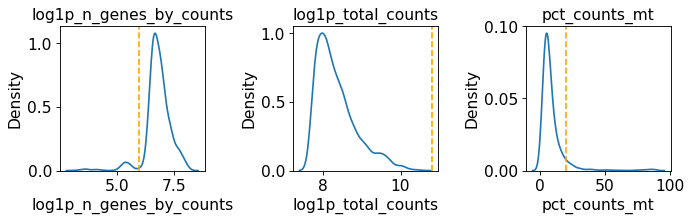

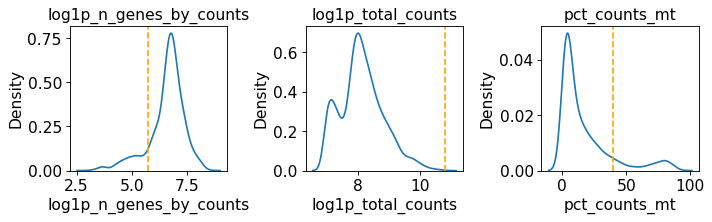

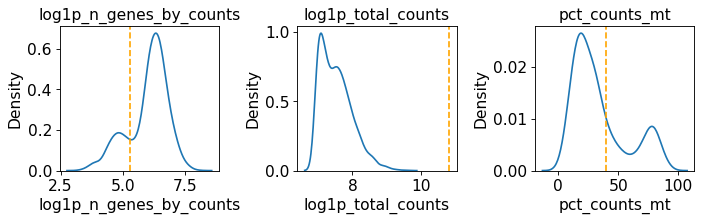

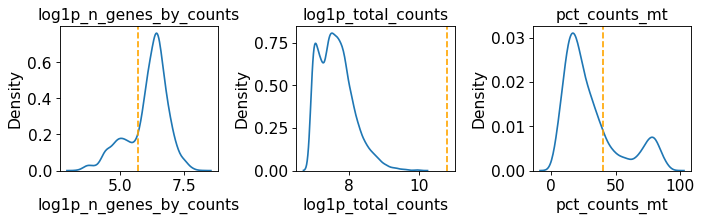

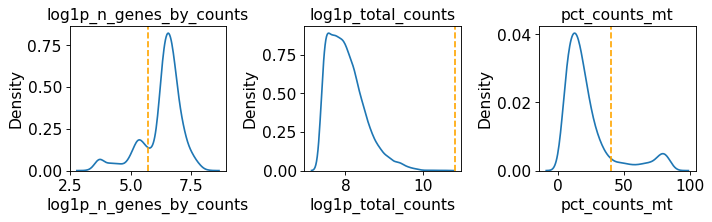

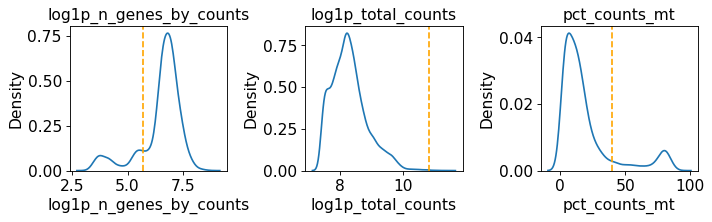

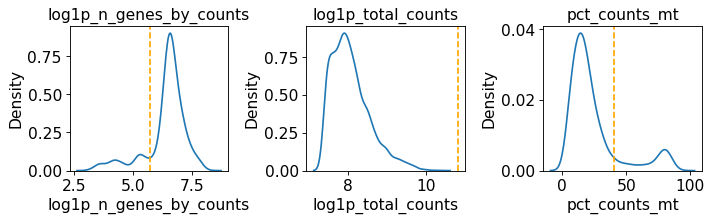

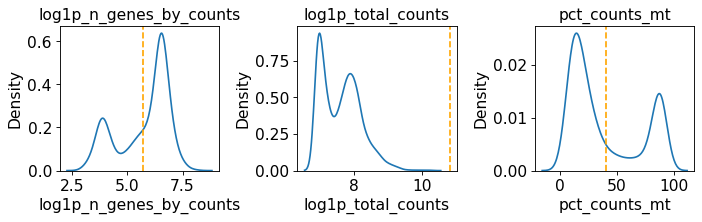

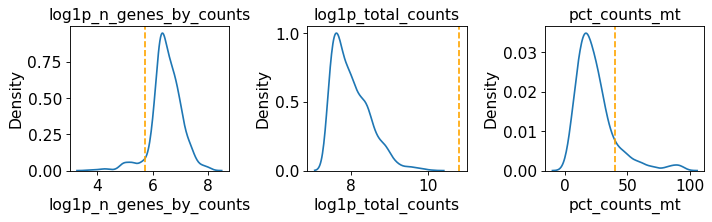

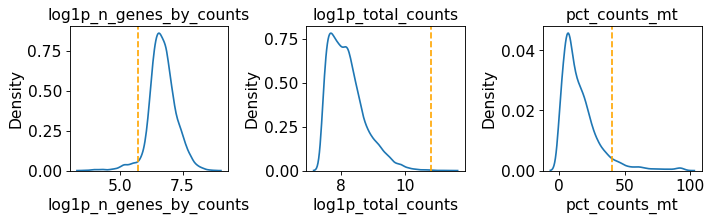

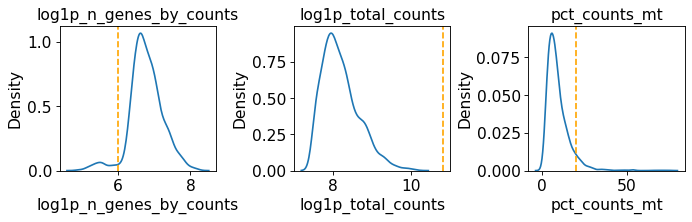

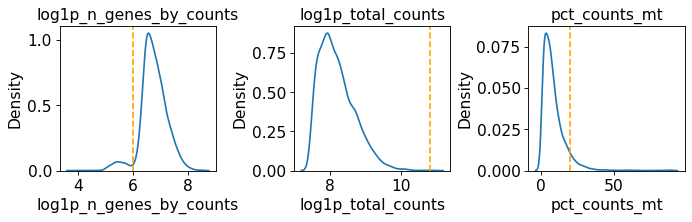

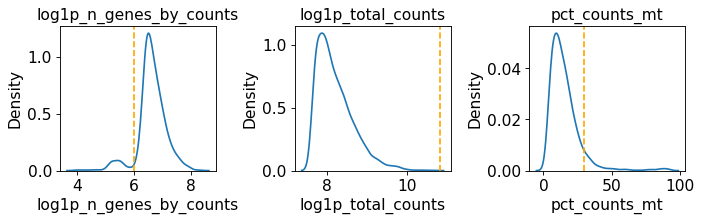

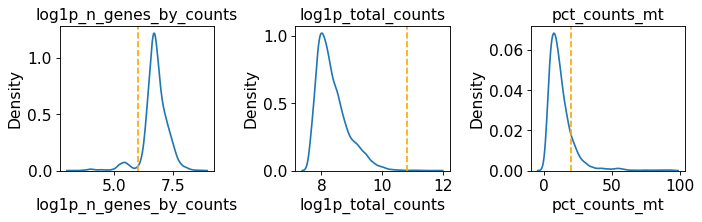

In [84]:
cutoffs = [[400,50000, np.exp(20)],
           [300,50000, np.exp(40)],
           [200,50000, np.exp(40)],
           [300,50000, np.exp(40)],
           [300,50000, np.exp(40)],
           [300,50000, np.exp(40)],
           [300,50000, np.exp(40)],
           [300,50000, np.exp(40)],
           [300,50000, np.exp(40)],
           [300,50000, np.exp(40)],
           [400,50000, np.exp(20)],
           [400,50000, np.exp(20)],
           [400,50000, np.exp(30)],
           [400,50000, np.exp(20)]
           ]
for i in range(len(adata)):
    obs_terms = ['log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_mt']
    fig,ax = plt.subplots(1,3, figsize=(9,3))
    for j in range(len(obs_terms)):
        sns.kdeplot(adata[i].obs[obs_terms[j]], ax=ax[j])
        ax[j].grid(False)
        ax[j].set_title(obs_terms[j])
        ax[j].axvline(np.log1p(cutoffs[i][j]), c='orange', linestyle='--')
    plt.tight_layout()

In [85]:
for i in range(len(adata)):
    sc.pp.filter_cells(adata[i], min_genes=cutoffs[i][0])
    #sc.pp.filter_genes(adata[i], min_cells=1)
    adata[i] = adata[i][(adata[i].obs['total_counts'] <= cutoffs[i][1]) & (adata[i].obs['pct_counts_mt'] <= np.log(cutoffs[i][2])), :].copy()
    print(adata[i].obs['Condition'].value_counts().sort_index())

filtered out 134 cells that have less than 400 genes expressed


Injured    2546
Name: Condition, dtype: int64


filtered out 713 cells that have less than 300 genes expressed
filtered out 377 cells that have less than 200 genes expressed


Injured    4872
Name: Condition, dtype: int64
Healthy    1294
Name: Condition, dtype: int64


filtered out 3661 cells that have less than 300 genes expressed


Injured    10671
Name: Condition, dtype: int64


filtered out 1706 cells that have less than 300 genes expressed


Injured    6759
Name: Condition, dtype: int64


filtered out 1575 cells that have less than 300 genes expressed


Injured    8343
Name: Condition, dtype: int64


filtered out 696 cells that have less than 300 genes expressed


Healthy    3731
Name: Condition, dtype: int64


filtered out 1517 cells that have less than 300 genes expressed
filtered out 72 cells that have less than 300 genes expressed


Injured    2599
Name: Condition, dtype: int64
Injured    992
Name: Condition, dtype: int64


filtered out 450 cells that have less than 300 genes expressed
filtered out 96 cells that have less than 400 genes expressed


Injured    10711
Name: Condition, dtype: int64
Injured    1971
Name: Condition, dtype: int64


filtered out 390 cells that have less than 400 genes expressed


Injured    6846
Name: Condition, dtype: int64


filtered out 266 cells that have less than 400 genes expressed


Healthy    3598
Name: Condition, dtype: int64


filtered out 377 cells that have less than 400 genes expressed


Healthy    5791
Name: Condition, dtype: int64


In [86]:
for i in range(len(adata)):
    print(adata[i].shape)

(2546, 35117)
(4872, 35117)
(1294, 35117)
(10671, 35117)
(6759, 35117)
(8343, 35117)
(3731, 35117)
(2599, 35117)
(992, 35117)
(10711, 35117)
(1971, 35117)
(6846, 35117)
(3598, 35117)
(5791, 35117)


In [87]:
#combine and save the raw counts
adata1 = anndata.AnnData.concatenate(*adata) #, join='outer', fill_value=0

In [88]:
adata1.shape

(70724, 35117)

In [89]:
sc.pp.filter_genes(adata1, min_cells=1)

filtered out 7947 genes that are detected in less than 1 cells


In [96]:
del adata1.obs['ID']

In [97]:
adata1.write('./write/GSE145980_raw.h5ad')

# Normalisation

In [99]:
adata = sc.read('./write/GSE145980_raw.h5ad')

In [100]:
print(adata.shape)

(70724, 27170)


In [101]:
# normalisation
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)

normalizing by total count per cell
    finished (0:00:18): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


In [102]:
# log counts
sc.pp.log1p(adata)

In [103]:
adata.raw = adata

In [104]:
print(adata.shape)

(70724, 27170)


In [105]:
adata.write('./write/GSE145980_lognorm.h5ad')

# Cell Cycle Assignment

In [106]:
adata = sc.read('./write/GSE145980_lognorm.h5ad')

In [107]:
print(adata.shape)

(70724, 27170)


In [108]:
cell_cycle_genes = [x.strip()[0].upper()+x.strip()[1:].lower() for x in open('/nfs01data1/Groups/Wangxiaonan/Lab_members/Files/regev_lab_cell_cycle_genes.txt')]
print(len(cell_cycle_genes))

97


In [109]:
s_genes = cell_cycle_genes[:43]
g2m_genes = cell_cycle_genes[43:]
print(len(s_genes))
print(len(g2m_genes))

43
54


In [110]:
GN = pd.read_csv('../drerio_mmusculus.txt', delimiter='\t', index_col=0)

In [111]:
GN.head(3)

,external_gene_name,mmusculus_homolog_ensembl_gene,mmusculus_homolog_associated_gene_name
ensembl_gene_id,,,
ENSDARG00000063344,fam162a,ENSMUSG00000019909,Fam162b
ENSDARG00000097685,si:ch211-235i11.3,NaN,NaN
ENSDARG00000036008,caly,ENSMUSG00000025468,Caly


In [112]:
SGo = np.intersect1d(s_genes, [str(x) for x in GN['mmusculus_homolog_associated_gene_name']])
Stab = GN[np.in1d([str(x) for x in GN['mmusculus_homolog_associated_gene_name']], SGo)]
G2Mo = np.intersect1d(g2m_genes, [str(x) for x in GN['mmusculus_homolog_associated_gene_name']])
G2Mtab = GN[np.in1d([str(x) for x in GN['mmusculus_homolog_associated_gene_name']], G2Mo)]

In [113]:
sg_drerio = np.unique([str(x) for x in Stab['external_gene_name']])
g2mg_drerio = np.unique([str(x) for x in G2Mtab['external_gene_name']])
print(len(sg_drerio))
print(len(g2mg_drerio))

40
51


In [114]:
sg_drerio_ol = np.intersect1d(sg_drerio, adata.raw.var_names)
g2mg_drerio_ol = np.intersect1d(g2mg_drerio, adata.raw.var_names)
print(len(sg_drerio_ol))
print(len(g2mg_drerio_ol))

40
49


In [115]:
Index = adata.obs['Index'].cat.categories
print(Index)

Index(['GSM4340637', 'GSM4340638', 'GSM4340639', 'GSM4340640', 'GSM4340641',
       'GSM4340642', 'GSM4340643', 'GSM4340644', 'GSM4340645', 'GSM4340646',
       'GSM4340647', 'GSM4340648', 'GSM4340649', 'GSM4340650'],
      dtype='object')


In [116]:
phase = []
for i in range(len(Index)):
    adata_sub = adata[adata.obs['Index'] == Index[i]].copy()
    print(adata_sub.shape)
    sc.pp.scale(adata_sub)
    sc.tl.score_genes_cell_cycle(adata_sub, s_genes=sg_drerio, g2m_genes=g2mg_drerio, use_raw=False)
    phase.append(adata_sub.obs[['phase', 'S_score', 'G2M_score']])

(3598, 27170)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    680 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    678 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)


(5791, 27170)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    598 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    718 total control genes are used. (0:00:01)
-->     'phase', cell cycle phase (adata.obs)
calculating cell cycle phase
computing score 'S_score'


(992, 27170)


    finished: added
    'S_score', score of gene set (adata.obs).
    478 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    557 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)


(10711, 27170)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    519 total control genes are used. (0:00:02)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    680 total control genes are used. (0:00:01)
-->     'phase', cell cycle phase (adata.obs)


(1971, 27170)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    600 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    639 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)


(6846, 27170)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    718 total control genes are used. (0:00:01)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    718 total control genes are used. (0:00:01)
-->     'phase', cell cycle phase (adata.obs)


(2599, 27170)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    599 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    640 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)


(3731, 27170)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    638 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    720 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)


(1294, 27170)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    596 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    559 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)


(10671, 27170)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    640 total control genes are used. (0:00:02)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    679 total control genes are used. (0:00:02)
-->     'phase', cell cycle phase (adata.obs)


(6759, 27170)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    598 total control genes are used. (0:00:01)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    719 total control genes are used. (0:00:01)
-->     'phase', cell cycle phase (adata.obs)


(8343, 27170)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    678 total control genes are used. (0:00:01)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    600 total control genes are used. (0:00:01)
-->     'phase', cell cycle phase (adata.obs)


(2546, 27170)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    636 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    600 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)


(4872, 27170)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    717 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    759 total control genes are used. (0:00:01)
-->     'phase', cell cycle phase (adata.obs)


In [117]:
phase_pd = pd.concat(phase)

In [118]:
phase_pd.head()

,phase,S_score,G2M_score
ID,,,
wt_unjuried_1_AAACCTGAGAAAGTGG-12,G1,-0.058933,-0.082592
wt_unjuried_1_AAACCTGAGGGCACTA-12,S,0.079682,-0.010550
wt_unjuried_1_AAACCTGCAAGGTTCT-12,G1,-0.014045,-0.021246
wt_unjuried_1_AAACCTGTCAAGGTAA-12,G1,-0.107426,-0.073677
wt_unjuried_1_AAACCTGTCATAGCAC-12,S,0.224951,0.015787


In [119]:
phase_pd.to_csv('cell_cycle_results.txt')

# Select highly variable genes

In [120]:
adata = sc.read('./write/GSE145980_lognorm.h5ad')

In [121]:
cell_cycle_results = pd.read_csv('cell_cycle_results.txt', index_col=0)
adata.obs = pd.concat([adata.obs, cell_cycle_results], axis=1)

In [122]:
adata.obs.head(3)

,Index,Age,Development_stage,Condition,Day,Strain,Tissue,StudyID,CellType,Genotype,...,pct_counts_in_top_500_genes,total_counts_mt,log1p_total_counts_mt,pct_counts_mt,n_genes,batch,n_counts,phase,S_score,G2M_score
kit_14dpi_1_AAACCTGAGAAACCAT-0,GSM4340649,4-6m,adult,Injured,7,kita(w34b2);kitb(sa15356),heart,GSE145980,nonCMs,kit-/-,...,94.172932,276.0,5.624018,10.375940,655,0,2660.0,G1,-0.044446,-0.059141
kit_14dpi_1_AAACCTGAGTACTTGC-0,GSM4340649,4-6m,adult,Injured,7,kita(w34b2);kitb(sa15356),heart,GSE145980,nonCMs,kit-/-,...,96.290512,316.0,5.758902,12.338930,595,0,2561.0,G2M,-0.091099,0.084741
kit_14dpi_1_AAACCTGCAACACCCG-0,GSM4340649,4-6m,adult,Injured,7,kita(w34b2);kitb(sa15356),heart,GSE145980,nonCMs,kit-/-,...,100.000000,184.0,5.220356,5.344177,405,0,3443.0,S,0.090580,-0.030025


In [123]:
# find highly variable genes
# parameters are mainly selected depends on user preference
sc.pp.highly_variable_genes(
    adata, min_mean=0.02, max_mean=3, min_disp=0.3, batch_key='batch', inplace=True)

extracting highly variable genes
... storing 'phase' as categorical
    finished (0:00:39)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


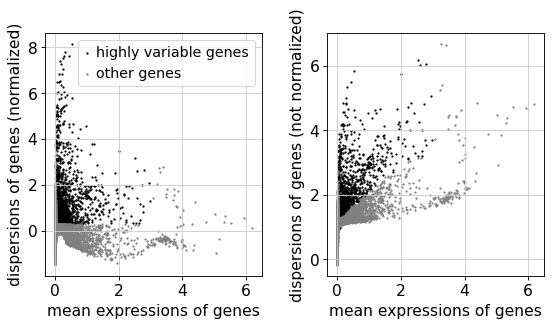

In [124]:
sc.pl.highly_variable_genes(adata)

In [125]:
print(np.sum(adata.var.highly_variable))

2376


In [126]:
adata = adata[:, adata.var.highly_variable].copy()

In [127]:
adata.write('./write/GSE145980_lognorm_hvg.h5ad')

# Preliminary processing

In [128]:
adata = sc.read('./write/GSE145980_lognorm_hvg.h5ad')

In [129]:
# normally regress out the top layers of unwanted effects
sc.pp.regress_out(adata, ['total_counts','n_genes_by_counts', 'pct_counts_mt'])

regressing out ['total_counts', 'n_genes_by_counts', 'pct_counts_mt']
    finished (0:04:27)


In [130]:
# scale for pca
sc.pp.scale(adata)
# pca
sc.tl.pca(adata, svd_solver='arpack')

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:11)


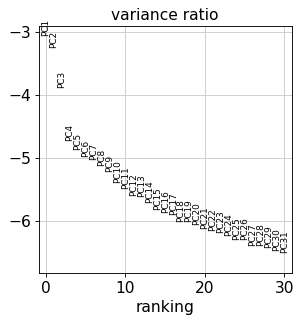

In [131]:
sc.pl.pca_variance_ratio(adata, log=True)

In [132]:
sc.pp.neighbors(adata)

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:31)


In [133]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:01:16)


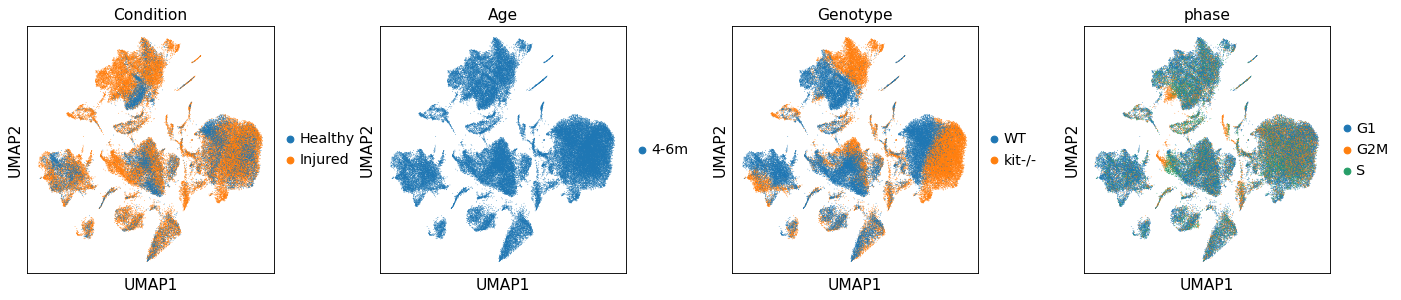

In [134]:
sc.pl.umap(adata, color= ['Condition', 'Age', 'Genotype', 'phase'], wspace=0.3)

In [135]:
adata.write('./write/GSE145980_processed.h5ad')